In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
fraud=pd.read_csv("C:\\Users\\prasa\\Downloads\\Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<AxesSubplot:>

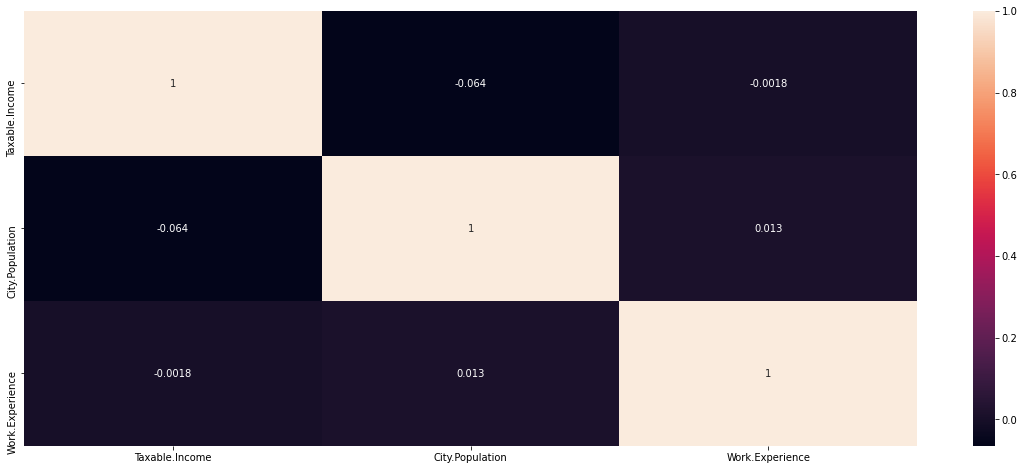

In [7]:
import seaborn as sns
plt.figure(figsize=(20,8))
sns.heatmap(fraud.corr(),annot=True)

In [9]:
# Some columns are in categorical type, let's transform them into numerical type.

In [10]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in fraud.columns:
    print(i)
    if fraud[i].dtypes== object:
        fraud[i]=encoder.fit_transform(fraud[i])
    else:
        pass

Undergrad
Marital.Status
Taxable.Income
City.Population
Work.Experience
Urban


In [11]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [12]:
# The target variable 'Taxable income' is in numerical form. convert it into categorical type.

In [14]:
status=[]

for i in fraud['Taxable.Income']:
    if i<=30000:
        status.append('Risky')
    else:
        status.append('Good')
fraud['status']= status

In [15]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [17]:
fraud1=fraud.drop('Taxable.Income', axis=True)
fraud1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,status
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good


In [24]:
x=fraud1.iloc[:,0:5]
y=fraud1['status']

In [25]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [26]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: status, Length: 600, dtype: object

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

## Bagging Method

In [28]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
cart = DecisionTreeClassifier()
num_trees = 100
kfold = KFold(n_splits=10)
model1 = BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=40)
results = cross_val_score(model1, x,y, cv=kfold)
print(results.mean())

0.7333333333333333


In [30]:
#Predicting on test data
model1.fit(x_train,y_train)
preds1 = model1.predict(x_test)
pd.Series(preds1).value_counts() 

Good     166
Risky     14
dtype: int64

In [31]:
pd.crosstab(y_test,preds1)

col_0,Good,Risky
status,,
Good,125,12
Risky,41,2


In [32]:
#Accuracy
Accuracy=model1.score(x_test, y_test)
print('Bagging Method Accuracy is', Accuracy)

Bagging Method Accuracy is 0.7055555555555556


## Random Forest Classification

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [34]:
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10)

model2 = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=40)
results = cross_val_score(model2, x, y, cv=kfold)
print(results.mean())

0.755


In [35]:
#Predicting on test data
model2.fit(x_train,y_train)
preds2 = model2.predict(x_test)
pd.Series(preds2).value_counts()

Good     171
Risky      9
dtype: int64

In [36]:
pd.crosstab(y_test,preds2)

col_0,Good,Risky
status,,
Good,130,7
Risky,41,2


In [37]:
Accuracy2= model2.score(x_test,y_test)
print('Random Forest Accuracy is', Accuracy2)

Random Forest Accuracy is 0.7333333333333333


## AdaBoost Classification

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [42]:
num_trees = 10
kfold = KFold(n_splits=10)
model3 = AdaBoostClassifier(n_estimators=num_trees,random_state=10)
results = cross_val_score(model3, x, y, cv=kfold)
print(results.mean())


0.7916666666666666


In [43]:
#Predicting on test data
model3.fit(x_train,y_train)
preds3 = model3.predict(x_test)
pd.Series(preds3).value_counts()

Good    180
dtype: int64

In [44]:
pd.crosstab(y_test,preds3)

col_0,Good
status,
Good,137
Risky,43


In [45]:
Accuracy3= model3.score(x_test,y_test)
print('AdaBoost Accuracy is', Accuracy3)

AdaBoost Accuracy is 0.7611111111111111


## Stacking Ensemble for Classification

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [48]:
kfold = KFold(n_splits=10)
# create the sub models
estimators = []
m1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', m1))
m2 = DecisionTreeClassifier()
estimators.append(('cart', m2))
m3 = SVC()
estimators.append(('svm', m3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7933333333333332


## iteration with different k values

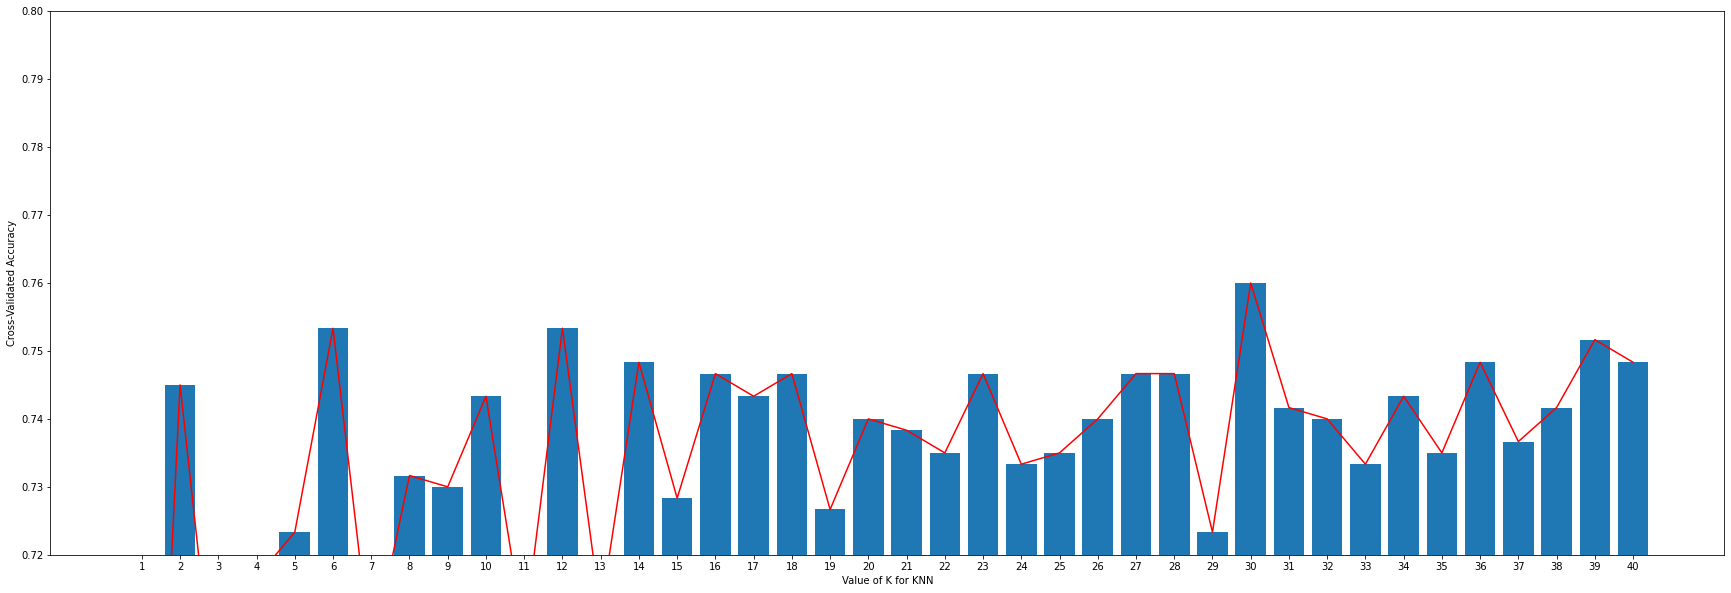

In [50]:
k_range =range(1,41)
k_scores = []
for k in k_range:
    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(30,10))
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.72,0.8)
plt.show()

In [51]:
k_scores

[0.6316666666666666,
 0.745,
 0.6933333333333334,
 0.7166666666666667,
 0.7233333333333334,
 0.7533333333333332,
 0.705,
 0.7316666666666667,
 0.73,
 0.7433333333333334,
 0.7083333333333333,
 0.7533333333333334,
 0.7116666666666666,
 0.7483333333333333,
 0.7283333333333333,
 0.7466666666666667,
 0.7433333333333334,
 0.7466666666666667,
 0.7266666666666668,
 0.74,
 0.7383333333333334,
 0.735,
 0.7466666666666667,
 0.7333333333333334,
 0.7350000000000001,
 0.74,
 0.7466666666666667,
 0.7466666666666667,
 0.7233333333333334,
 0.76,
 0.7416666666666666,
 0.74,
 0.7333333333333334,
 0.7433333333333334,
 0.735,
 0.7483333333333333,
 0.7366666666666667,
 0.7416666666666666,
 0.7516666666666667,
 0.7483333333333333]